# 基于文本的表情符号预测模型😊😊😊
### 数据支持：golve.6B.300d.txt  (下载链接https://nlp.stanford.edu/projects/glove/）
### 训练集文件：train_emoji.csv 测试集文件：test_emoji.csv
### 模型使用：LSTM神经网络 GRU神经网络
### 项目时间：2020年4月25日

## Part 1 导入emoji库(下载及安装pip3 install emoji)+部分emoji可视化

In [1]:
import emoji

# 定义表情词典库
emoji_dic = {0:':orange_heart:',1:':baseball:',2:':grinning_face_with_big_eyes:', 
             3:':downcast_face_with_sweat:',4:':fork_and_knife:'}

# 通过emoji库输出表情符号
for tmp in emoji_dic.values():
    print(emoji.emojize(tmp))

🧡
⚾
😃
😓
🍴


## Part 2 载入训练集和测试集，对数据进行预处理

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train_emoji.csv', header=None)
test_data = pd.read_csv('test_emoji.csv', header=None)
print('载入数据完毕，训练集数据长度:{},测试集数据长度:{}'.format(train_data.shape[0], test_data.shape[0]))

载入数据完毕，训练集数据长度:132,测试集数据长度:56


In [3]:
# 将训练集和测试集数据按照特征和标签进行划分
train_X = train_data[0]
train_y = train_data[1]
test_X = test_data[0]
test_y = test_data[1]

# 以测试集为例抽取前10个样本进行print
for i in range(10):
    print(train_X[i], emoji.emojize(emoji_dic[train_y[i]]))

never talk to me again 😓
I am proud of your achievements 😃
It is the worst day in my life 😓
Miss you so much 🧡
food is life 🍴
I love you mum 🧡
Stop saying bullshit 😓
congratulations on your acceptance 😃
The assignment is too long  😓
I want to go play ⚾


In [4]:
# 加载训练好的词向量文件glove.6B.50d
word_embed = dict()
for line in open('/Users/xujie/Desktop/Python/nlp/data/word_embeding/glove.6B.300d.txt'):
    line = line.split()
    word = line[0]
    embed_vec = line[1:]
    word_embed[word] = list(map(float, embed_vec))
print('加载词向量完毕，词向量库长度为:{}'.format(len(word_embed)))

加载词向量完毕，词向量库长度为:400000


In [5]:
# 将训练集和测试集的train_X和test_X转化为词向量形式
dim_embed = 300 # 定义词向量维度
max_sent_len = 10 # 定义最大单词长度

# 定义转化函数convert2embed()
def convert2embed(obj_data):
    out_embed = np.zeros((obj_data.shape[0], max_sent_len, dim_embed))
    for i, line in enumerate(obj_data):
        line = line.split()
        for j, word in enumerate(line):
            if word.lower() not in word_embed.keys(): continue
            out_embed[i][j] = word_embed[word.lower()]
    return out_embed

In [6]:
# 结构化训练集和测试集数据(将特征X转化为词向量，将标签y转化为one-hot编码)
import tensorflow as tf
train_embed = tf.constant(convert2embed(train_X))
test_embed = tf.constant(convert2embed(test_X))
train_y_one_hot = tf.one_hot(train_y, depth=5)
test_y_one_hot = tf.one_hot(test_y, depth=5)

## Part 3 搭建深度神经网络框架

In [7]:
from tensorflow.keras import layers, Sequential, optimizers, losses

In [22]:
# 实例化LSTM深度网络
model_LSTM = Sequential()
# 加入第一个LSTM层 输入维度max_sent_len * dim_embed
model_LSTM.add(layers.LSTM(64, input_shape=(max_sent_len,dim_embed), return_sequences=True))
# 随机失活防止过拟合 参数=0.4
model_LSTM.add(layers.Dropout(0.4))
# 加入第二个LSTM层
model_LSTM.add(layers.LSTM(64, return_sequences=False))
# 随机失活防止过拟合 参数=0.3
model_LSTM.add(layers.Dropout(0.4))
# 最后加入全连接层，用softmax激活函数输出
model_LSTM.add(layers.Dense(5, activation='softmax'))
# 编译模型: 优化器 Adam; 损失函数 交叉熵损失; 优化准则 精确度
model_LSTM.compile(optimizer=optimizers.Adam(lr=0.01), 
              loss=losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 输出网络结构
model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 64)            93440     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 126,789
Trainable params: 126,789
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 实例化GRU深度网络
model_GRU = Sequential()
# 加入第一个GRU层 输入维度max_sent_len * dim_embed
model_GRU.add(layers.GRU(64, input_shape=(max_sent_len,dim_embed), return_sequences=True))
# 随机失活防止过拟合 参数=0.4
model_GRU.add(layers.Dropout(0.4))
# 加入第二个GRU层
model_GRU.add(layers.GRU(64, return_sequences=False))
# 随机失活防止过拟合 参数=0.3
model_GRU.add(layers.Dropout(0.4))
# 最后加入全连接层，用softmax激活函数输出
model_GRU.add(layers.Dense(5, activation='softmax'))
# 编译模型: 优化器 Adam; 损失函数 交叉熵损失; 优化准则 精确度
model_GRU.compile(optimizer=optimizers.Adam(lr=0.01), 
              loss=losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 输出网络结构
model_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 10, 64)            70272     
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 95,557
Trainable params: 95,557
Non-trainable params: 0
_________________________________________________________________


## Part 4 模型预测与评估 

In [24]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# 训练LSTM深度神经网络
epochs = 60 # 定义迭代次数
checkpoint_LSTM = ModelCheckpoint('best_model_LSTM.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkpoint_GRU = ModelCheckpoint('best_model_GRU.h5', monitor='val_loss', verbose=True, save_best_only=True)
# 提前终止，防止过拟合
early_stop = EarlyStopping(monitor='val_accuracy', patience=10)

In [25]:
# 训练LSTM模型
hist_LSTM = model_LSTM.fit(train_embed, # 训练数据词向量特征
                           train_y_one_hot, # 训练数据one-hot编码
                           epochs=epochs, # 迭代次数
                           batch_size=64, # 批量
                           shuffle=True, # 是否随机打乱
                           validation_split=0.2, # 验证集划分比例
                           callbacks=[early_stop, checkpoint_LSTM] # 加入early_stop和checkpoint
                          )
model_LSTM.save_weights('/Users/xujie/Desktop/Python/nlp/项目/表情符号预测')

Train on 105 samples, validate on 27 samples
Epoch 1/60
 64/105 [=================>............] - ETA: 5s - loss: 1.6112 - accuracy: 0.1250
Epoch 00001: val_loss improved from inf to 1.60994, saving model to best_model_LSTM.h5
105/105 [==============================] - 11s 104ms/sample - loss: 1.5922 - accuracy: 0.2381 - val_loss: 1.6099 - val_accuracy: 0.2222
Epoch 2/60
 64/105 [=================>............] - ETA: 0s - loss: 1.5639 - accuracy: 0.3125
Epoch 00002: val_loss did not improve from 1.60994
105/105 [==============================] - 0s 3ms/sample - loss: 1.5604 - accuracy: 0.3238 - val_loss: 1.6540 - val_accuracy: 0.1852
Epoch 3/60
 64/105 [=================>............] - ETA: 0s - loss: 1.4770 - accuracy: 0.3750
Epoch 00003: val_loss improved from 1.60994 to 1.50972, saving model to best_model_LSTM.h5
105/105 [==============================] - 0s 4ms/sample - loss: 1.4835 - accuracy: 0.3714 - val_loss: 1.5097 - val_accuracy: 0.4074
Epoch 4/60
 64/105 [================

 64/105 [=================>............] - ETA: 0s - loss: 0.9066 - accuracy: 1.0000
Epoch 00028: val_loss did not improve from 0.97183
105/105 [==============================] - 0s 3ms/sample - loss: 0.9061 - accuracy: 1.0000 - val_loss: 1.1104 - val_accuracy: 0.7778


In [26]:
# 训练GRU深度神经网络
hist_GRU = model_GRU.fit(train_embed, # 训练数据词向量特征
                         train_y_one_hot, # 训练数据one-hot编码
                         epochs=epochs, # 迭代次数
                         batch_size=64, # 批量
                         shuffle=True, # 是否随机打乱
                         validation_split=0.2, # 验证集划分比例
                         callbacks=[early_stop, checkpoint_GRU] # 加入early_stop和checkpoint
                        )
model_GRU.save_weights('/Users/xujie/Desktop/Python/nlp/项目/表情符号预测')

Train on 105 samples, validate on 27 samples
Epoch 1/60
 64/105 [=================>............] - ETA: 7s - loss: 1.6060 - accuracy: 0.2812
Epoch 00001: val_loss improved from inf to 1.61720, saving model to best_model_GRU.h5
105/105 [==============================] - 13s 128ms/sample - loss: 1.5965 - accuracy: 0.2952 - val_loss: 1.6172 - val_accuracy: 0.2222
Epoch 2/60
 64/105 [=================>............] - ETA: 0s - loss: 1.5020 - accuracy: 0.3594
Epoch 00002: val_loss did not improve from 1.61720
105/105 [==============================] - 0s 3ms/sample - loss: 1.5418 - accuracy: 0.2857 - val_loss: 1.6451 - val_accuracy: 0.1852
Epoch 3/60
 64/105 [=================>............] - ETA: 0s - loss: 1.5702 - accuracy: 0.2656
Epoch 00003: val_loss improved from 1.61720 to 1.51836, saving model to best_model_GRU.h5
105/105 [==============================] - 0s 3ms/sample - loss: 1.5465 - accuracy: 0.3143 - val_loss: 1.5184 - val_accuracy: 0.3333
Epoch 4/60
 64/105 [=================>

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 定义对预测结果进行评估的函数report_results() 

# 评估内容包括: precision recall F1-score
def report_results(test_y, pred, method=''):
    # 计算混淆矩阵
    confm = confusion_matrix(test_y, pred)
    # 对混淆矩阵进行可视化
    plt.figure(figsize=(8,8))
    sns.heatmap(confm.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicr Label')
    plt.title(method+' '+'Confusion Matrix')
    plt.show()
    # print分类precision recall 和 F-1 Score的报告
    print(method+' '+'Classification Report：', '\n', classification_report(test_y, pred))
    return

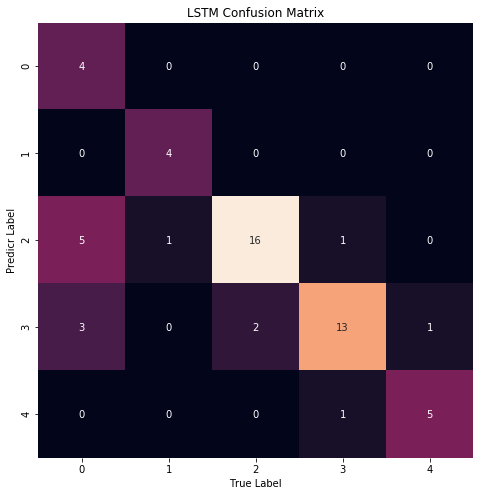

LSTM Classification Report： 
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       1.00      0.80      0.89         5
           2       0.70      0.89      0.78        18
           3       0.68      0.87      0.76        15
           4       0.83      0.83      0.83         6

    accuracy                           0.75        56
   macro avg       0.84      0.74      0.75        56
weighted avg       0.80      0.75      0.73        56



In [27]:
# 在测试集上对LSTM模型进行预测
pred_LSTM = model_LSTM.predict_classes(test_embed)

# 评估模型
report_results(test_y, pred_LSTM, method='LSTM')

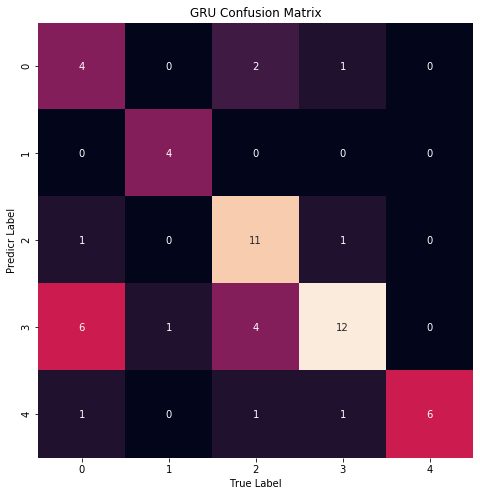

GRU Classification Report： 
               precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       1.00      0.80      0.89         5
           2       0.85      0.61      0.71        18
           3       0.52      0.80      0.63        15
           4       0.67      1.00      0.80         6

    accuracy                           0.66        56
   macro avg       0.72      0.71      0.69        56
weighted avg       0.69      0.66      0.65        56



In [15]:
# 在测试集上对GRU模型进行预测
pred_GRU = model_GRU.predict_classes(test_embed)

# 评估模型
report_results(test_y, pred_GRU, method='GRU')

In [28]:
# 输出LSTM和GRU深度神经网络预测的结果
for i in range(test_X.shape[0]):
    print('text:', test_X[i],  
          'predict_LSTM:', emoji.emojize(emoji_dic[pred_LSTM[i]]),
          'predict_GRU:', emoji.emojize(emoji_dic[pred_GRU[i]]), 
          'true:', emoji.emojize(emoji_dic[test_y[i]]))

text: I want to eat	 predict_LSTM: 🍴 predict_GRU: 🍴 true: 🍴
text: he did not answer	 predict_LSTM: 😓 predict_GRU: 😓 true: 😓
text: he got a raise	 predict_LSTM: 😃 predict_GRU: 😓 true: 😃
text: she got me a present	 predict_LSTM: 😃 predict_GRU: 😓 true: 🧡
text: ha ha ha it was so funny	 predict_LSTM: 😃 predict_GRU: 😃 true: 😃
text: he is a good friend	 predict_LSTM: 😃 predict_GRU: 🧡 true: 🧡
text: I am upset	 predict_LSTM: 😓 predict_GRU: 😓 true: 🧡
text: We had such a lovely dinner tonight	 predict_LSTM: 😃 predict_GRU: 🍴 true: 🧡
text: where is the food	 predict_LSTM: 🍴 predict_GRU: 🍴 true: 🍴
text: Stop making this joke ha ha ha	 predict_LSTM: 😃 predict_GRU: 😃 true: 😃
text: where is the ball	 predict_LSTM: ⚾ predict_GRU: ⚾ true: ⚾
text: work is hard	 predict_LSTM: 😓 predict_GRU: 😓 true: 😓
text: This girl is messing with me	 predict_LSTM: 😓 predict_GRU: 😓 true: 😓
text: are you serious ha ha	 predict_LSTM: 😃 predict_GRU: 😃 true: 😃
text: Let us go play baseball	 predict_LSTM: ⚾ predict_GRU: ⚾ tru